# Praca domowa 6

**28.05.2020r.**

**Agata Makarewicz**

## Wczytanie potrzebnych pakietów

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import copy
import warnings
warnings.filterwarnings('ignore')

## Wczytanie danych

In [2]:
np.random.seed(123) 

# wczytanie danych
data = pd.read_csv('../../clustering_R3.csv')
data.head()

X1          X2        X3
0  152.077986  197.910402  1.095707
1  145.520487  202.128032  2.738826
2  155.441273  198.122696  0.640457
3  150.389105  206.808383  0.686486
4  149.863221  205.417527  3.555814

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
 2   X3      1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [4]:
data.describe()

X1           X2           X3
count  1000.000000  1000.000000  1000.000000
mean    240.181036   154.937365     5.454947
std     115.556334    41.964161     4.793973
min      38.516347    87.376621     0.125057
25%     148.801776   104.853322     1.806255
50%     231.754437   151.846118     3.430892
75%     350.277958   198.367658     8.287805
max     399.930758   213.917568    24.537806

Mamy zbiór 1000 obserwacji w wymiarze  $R^3$ , które nie są przypisane do żadnej klasy. Wszystkie 3 kolumny są typu float, nie mamy również żadnych brakujących wartości. Nasze dane to po prostu współrzędne punktów w przestrzeni $R^3$.
Widać, że dane przyjmują wartości z różnych przedziałów, korzystnie byłoby zatem je ustandaryzować.


## Wizualizacja danych

In [5]:
%matplotlib notebook 
def plot_data(data):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(data['X1'],data['X2'],data['X3'])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.view_init(25, 30)
    plt.show()
    
# w razie potrzeby polecam odpalić plik .ipynb i puścić wszystko od początku
# wówczas będzie można dowolnie obracać poniższe wykresy 3D :) 
# niestety coś za coś - wykresy 2D troszkę się przez to powiększają
# więc komórek z nimi nie polecam puszczać ponownie - gdyby tak się jednak zdarzyło 
# wystarczy kliknąć przycisk na końcu wyświetlającego się nad wykresem paska "Figure"

<IPython.core.display.Javascript object>


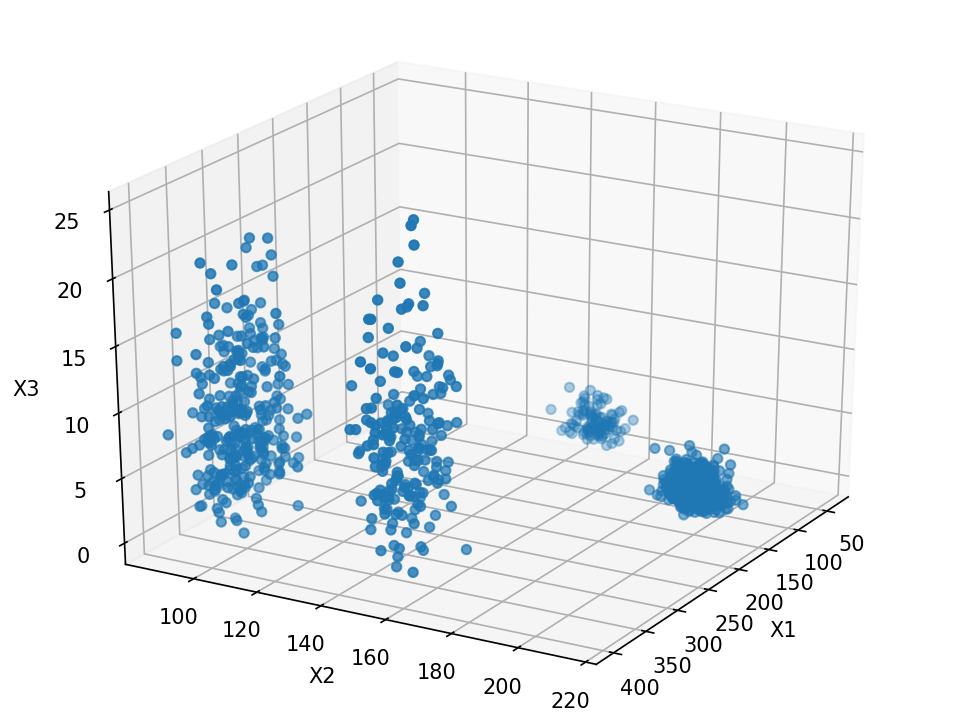

In [6]:
plot_data(data)

Na pierwszy rzut oka można zauważyć 4 klastry - dwa dość "zbite" oraz dwa bardziej rozproszone. To jednak wstępne przypuszczenia, lepiej wyciągać takie wnioski już po ustandaryzowaniu naszych danych.

## Standaryzacja

In [7]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=['X1','X2','X3'])

<IPython.core.display.Javascript object>


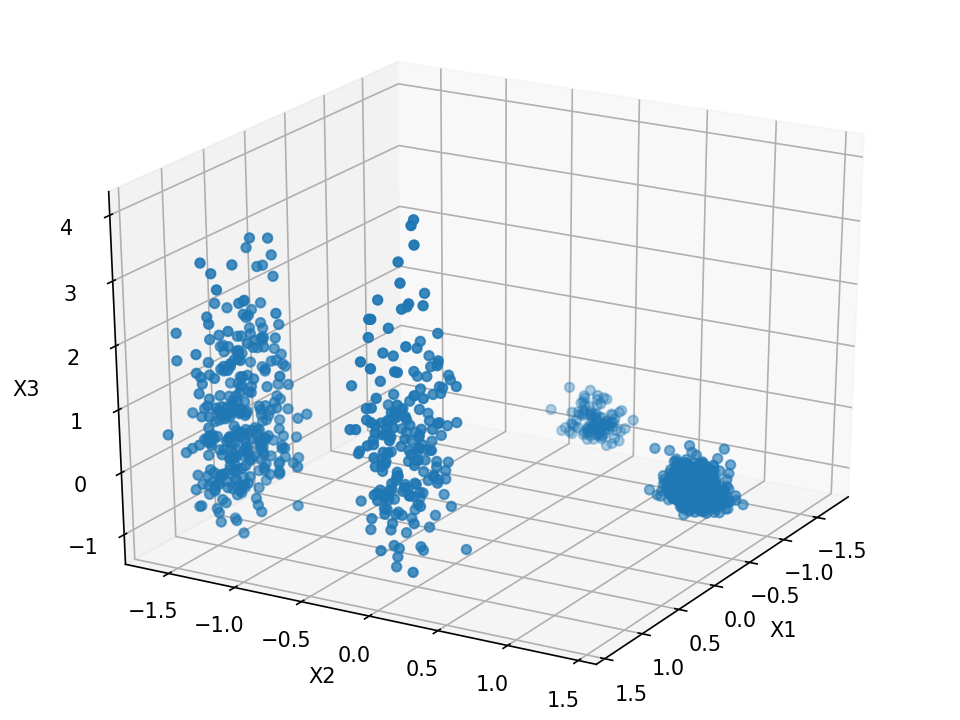

In [8]:
plot_data(data_scaled)

<IPython.core.display.Javascript object>


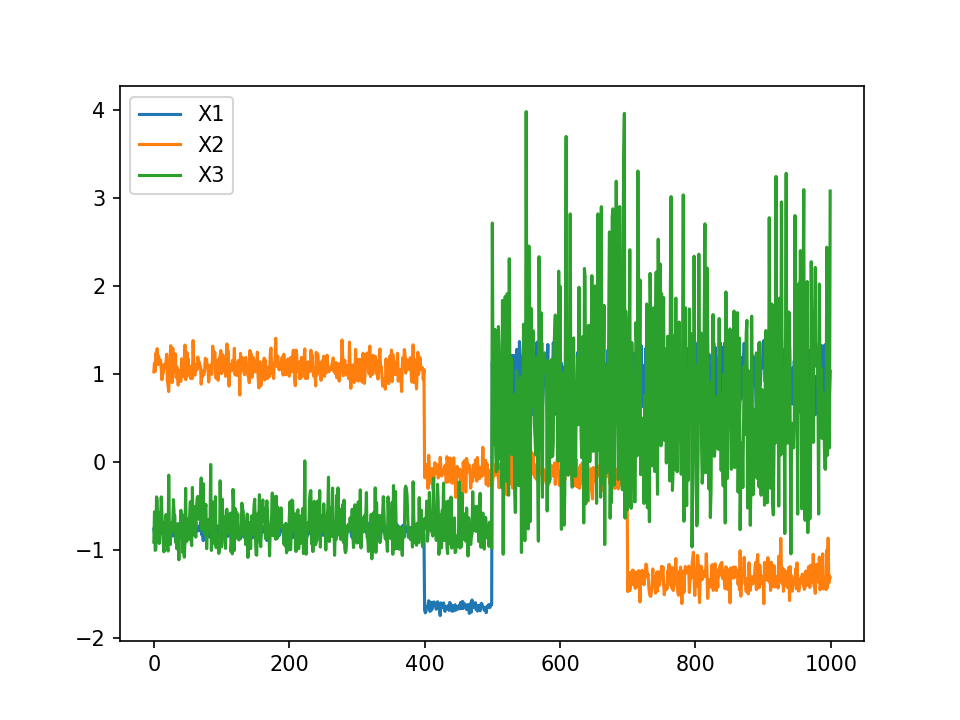

In [9]:
data_scaled.plot()

<IPython.core.display.Javascript object>


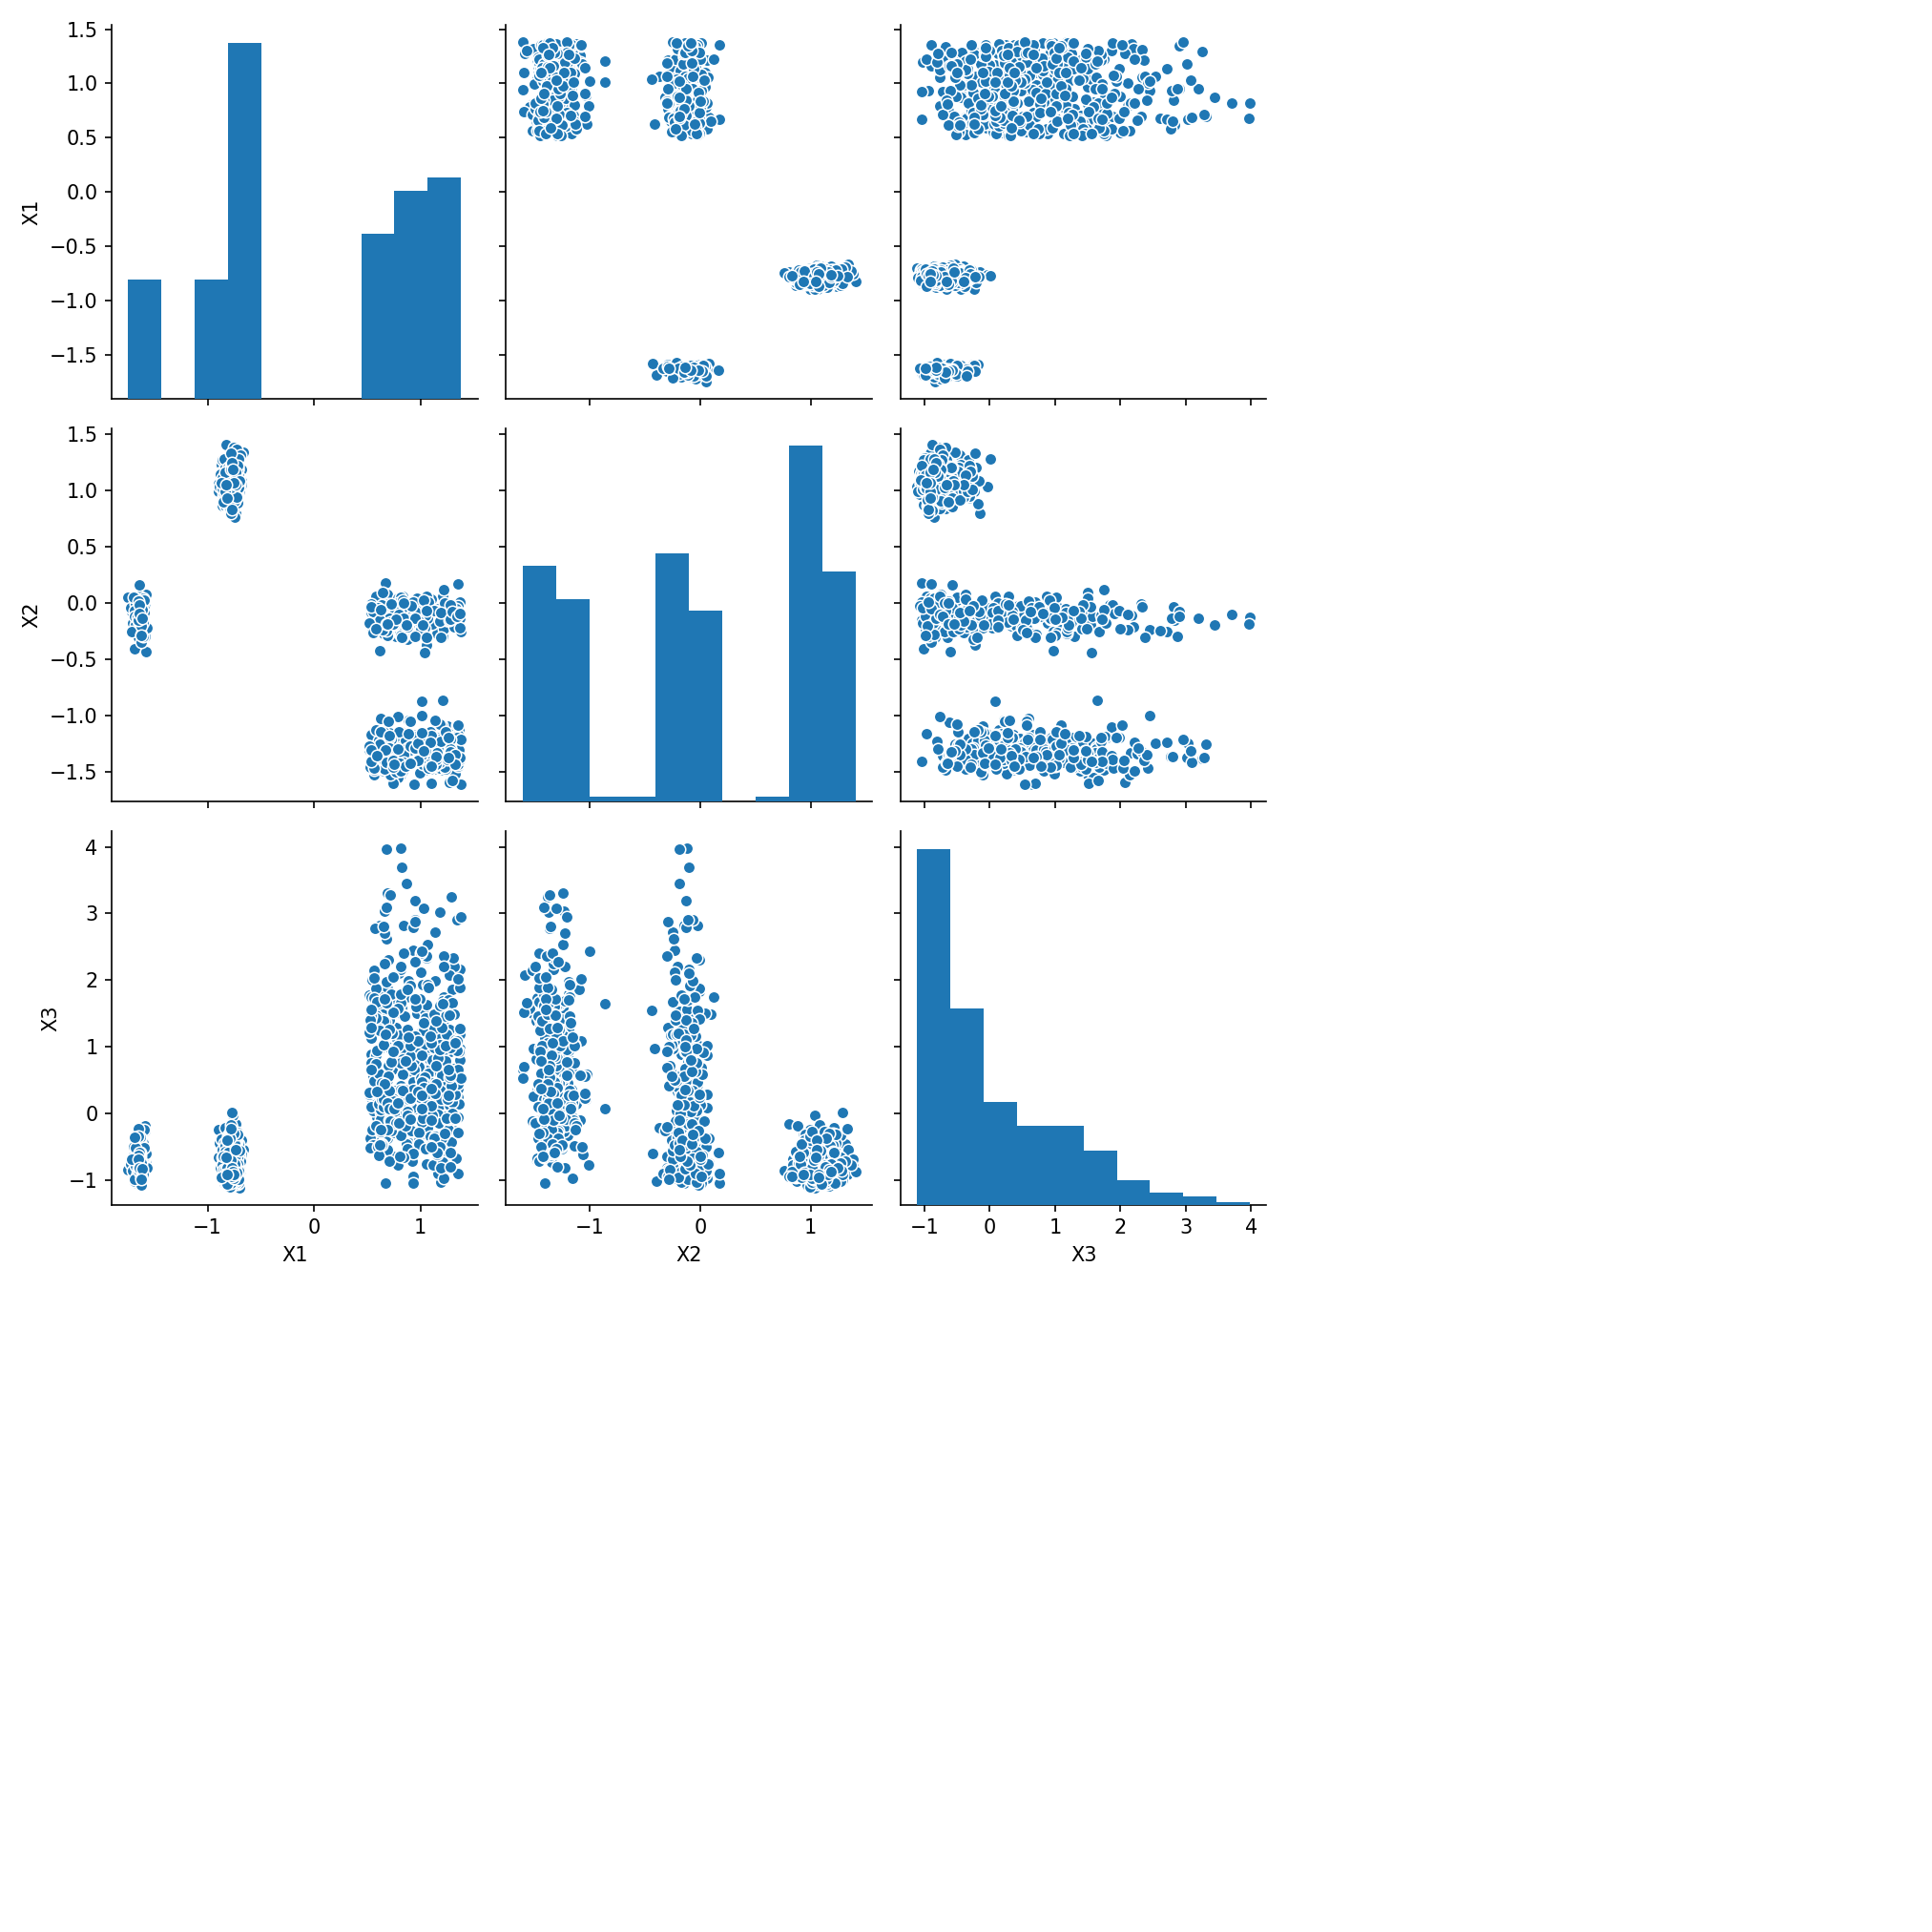

In [10]:
sns.pairplot(data_scaled, height=3)
plt.tight_layout()

Jak widać na powyższych wizualizacji, nadal "na oko" wydaje się, że nasze dane tworzą 4 klastry.

## Klasteryzacja

Przeprowadzimy klasteryzację za pomocą 2 metod:

* **DBSCAN**
* **GMM**

Do oceny powyższych algorytmów oraz do wyboru optymalnej liczby klastrów (w przypadku GMM) / parametru *epsilon* (w przypadku DBSCAN) użyjemy następujących metryk:

* **współczynnik Silhouette**\
    Uśredniona dla każdego punktu wartość opisująca, jak dobrze dany punkt pasuje do swojego klastra, w porównaniu pozostałymi. Promuje klastry okrągłe i zwarte. Wartość największą interpretujemy jako optymalną. Przyjmuje wartości z zakresu (-1,1).

* **indeks Calińskiego-Harabasza**\
    Porównuje rozrzut punktów w klastrach do rozrzutu punktów między klastrami, czyli im centroidy są bardziej od siebie oddalone lub punkty są bliżej centrów skupienia, tym wynik jest wyższy. Wartość największą interpretujemy jako optymalną. 

### DBSCAN

In [11]:
def dbscan_model(data, eps=0.3):
    dbs = DBSCAN(eps=eps)
    labels = dbs.fit_predict(data)
    return labels, dbs

In [12]:
sh_scores = [] 
ch_scores = []
for eps in np.arange(0.05, 1.05, 0.05):
    labels_dbs, dbs = dbscan_model(data_scaled, eps=eps)
    # Silhouette Score
    sh = silhouette_score(data_scaled, labels_dbs)
    sh_scores.append(sh)
    # Caliński-Harabasz Score
    ch = calinski_harabasz_score(data_scaled, labels_dbs)
    ch_scores.append(ch)

<IPython.core.display.Javascript object>


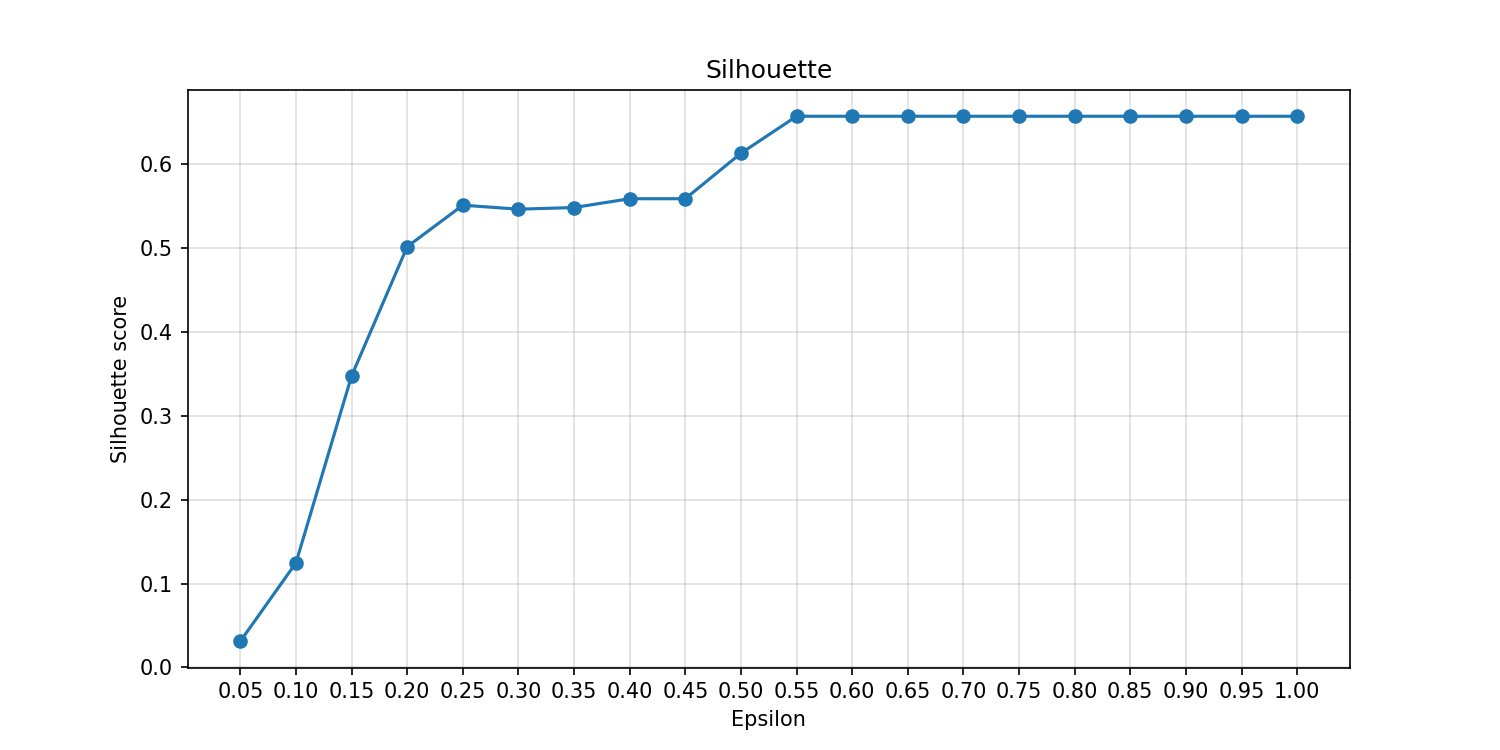

In [13]:
eps_seq = np.arange(0.05, 1.05, 0.05)

plt.figure(figsize = (10, 5))
plt.plot(eps_seq, sh_scores, '-o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.grid(alpha=0.4)
plt.xticks(eps_seq)
plt.show()

<IPython.core.display.Javascript object>


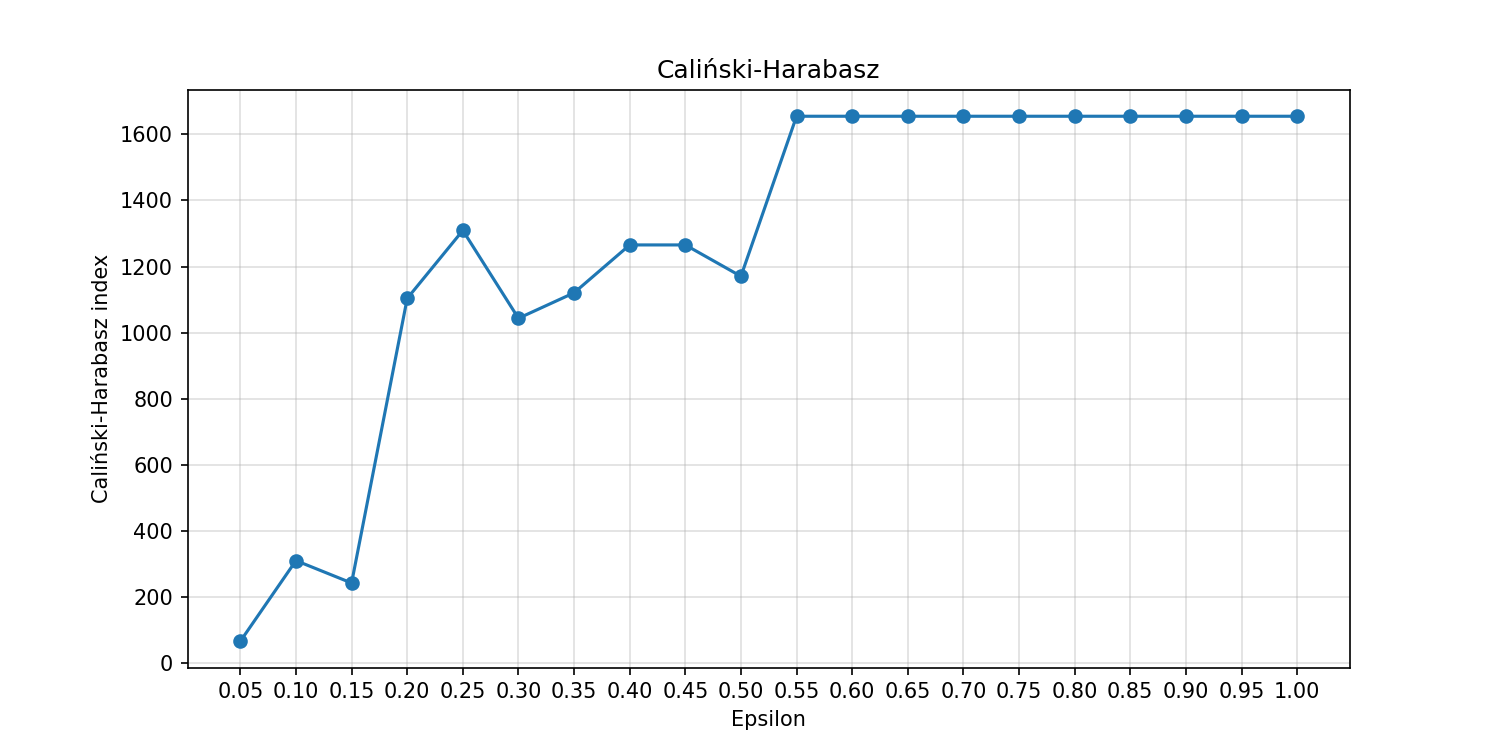

In [14]:
eps_seq = np.arange(0.05, 1.05, 0.05)

plt.figure(figsize = (10, 5))
plt.plot(eps_seq, ch_scores, '-o')
plt.xlabel('Epsilon')
plt.ylabel('Caliński-Harabasz index')
plt.title('Caliński-Harabasz')
plt.grid(alpha=0.4)
plt.xticks(eps_seq)
plt.show()

Obie metryki wskazały 0.55 jako najlepszą wartość parametru *epsilon*. Dokonamy zatem klasteryzacji dla tej właśnie wartości.

<IPython.core.display.Javascript object>


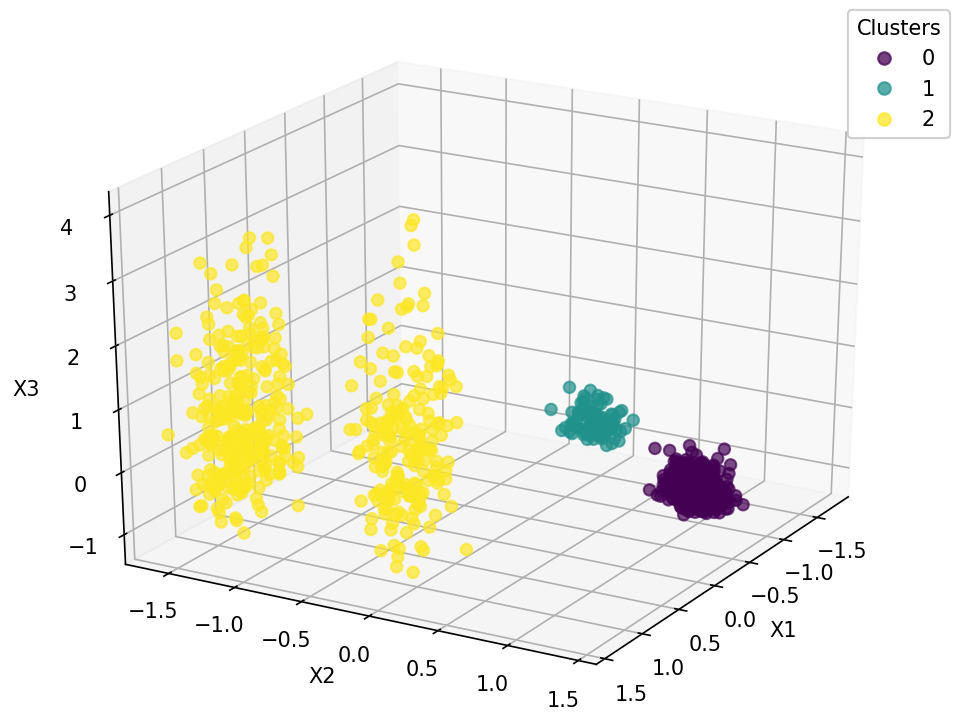

In [15]:
labels, dbs = dbscan_model(data_scaled, eps=0.55)
fig = plt.figure()
ax = Axes3D(fig)
plot = ax.scatter(data_scaled['X1'],data_scaled['X2'],data_scaled['X3'],c=labels, s=30, cmap='viridis', alpha=0.7)
legend = ax.legend(*plot.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.view_init(25, 30)
plt.show()

sh_dbs = silhouette_score(data_scaled,labels)
ch_dbs = calinski_harabasz_score(data_scaled,labels)

DBSCAN dla optymalnej wartości *epsilon* dzieli nasze dane na 3 klastry, a nie na 4 jak można by się tego na pierwszy rzut oka spodziewać. Widać natomiast, że przy takim podziale nie mamy żadnych "odrzuconych" obserwacji, tzn. nieprzyporządkowanych do żadnego klastra (label = -1), po czym można wnioskować, iż istotnie takie przypisanie jest najlepsze.

<IPython.core.display.Javascript object>


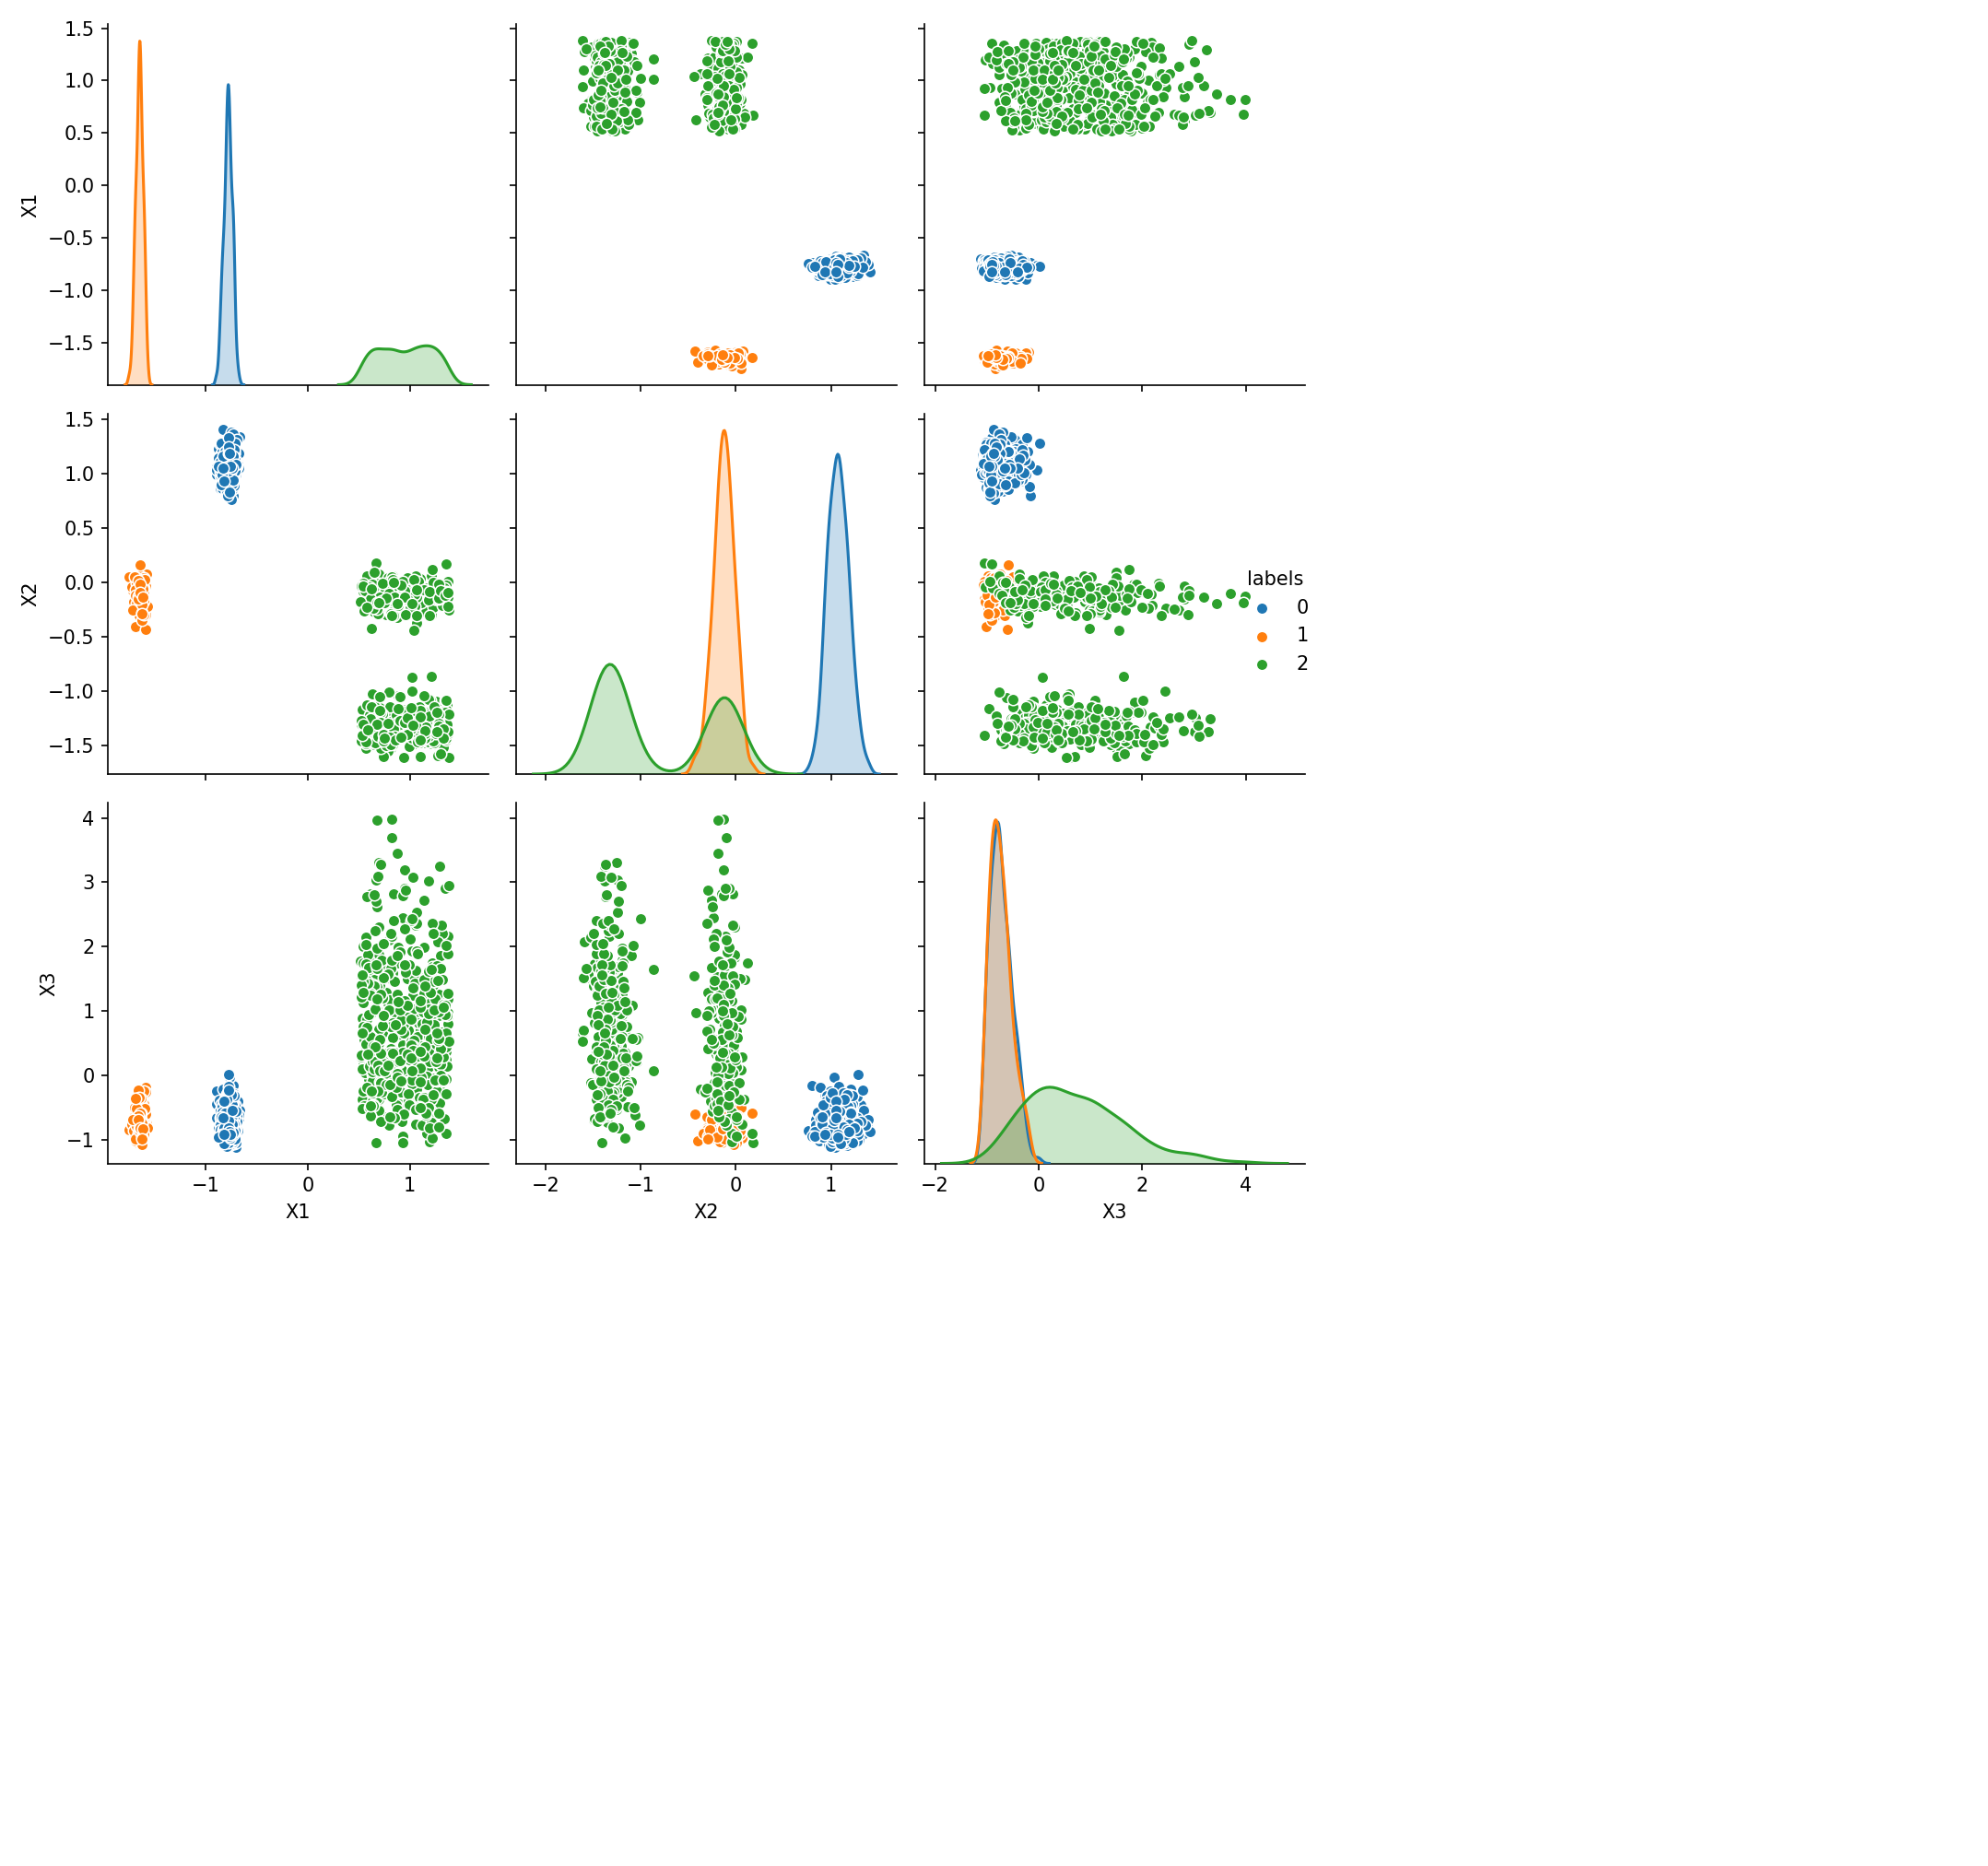

In [16]:
data_scaled_dbs = copy.deepcopy(data_scaled)
data_scaled_dbs['labels'] = labels
sns.pairplot(data_scaled_dbs, height=3, hue='labels', vars=["X1", "X2", "X3"])
plt.tight_layout()

### GMM

In [17]:
def gmm_model(data, n_components, covariance_type='full'):
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type)
    labels = gmm.fit_predict(data)
    return labels, gmm    

In [18]:
sh_scores = [] 
ch_scores = []
for k in range(2,11):
    labels_gmm, gmm = gmm_model(data_scaled,n_components=k)
    # Silhouette Score
    sh = silhouette_score(data_scaled, labels_gmm)
    sh_scores.append(sh)
    # Caliński-Harabasz Score
    ch = calinski_harabasz_score(data_scaled, labels_gmm)
    ch_scores.append(ch)

<IPython.core.display.Javascript object>


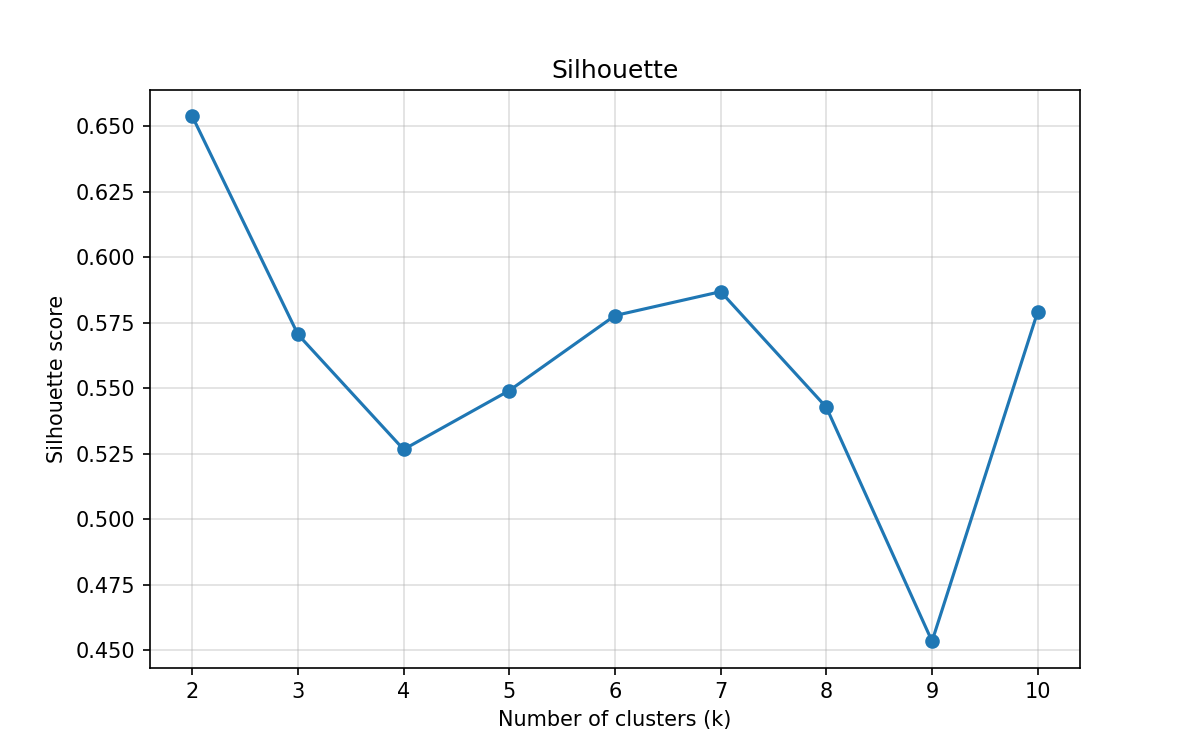

In [19]:
k_seq = range(2,11)

plt.figure(figsize = (8, 5))
plt.plot(k_seq, sh_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.grid(alpha=0.4)
plt.xticks(k_seq)
plt.show()

<IPython.core.display.Javascript object>


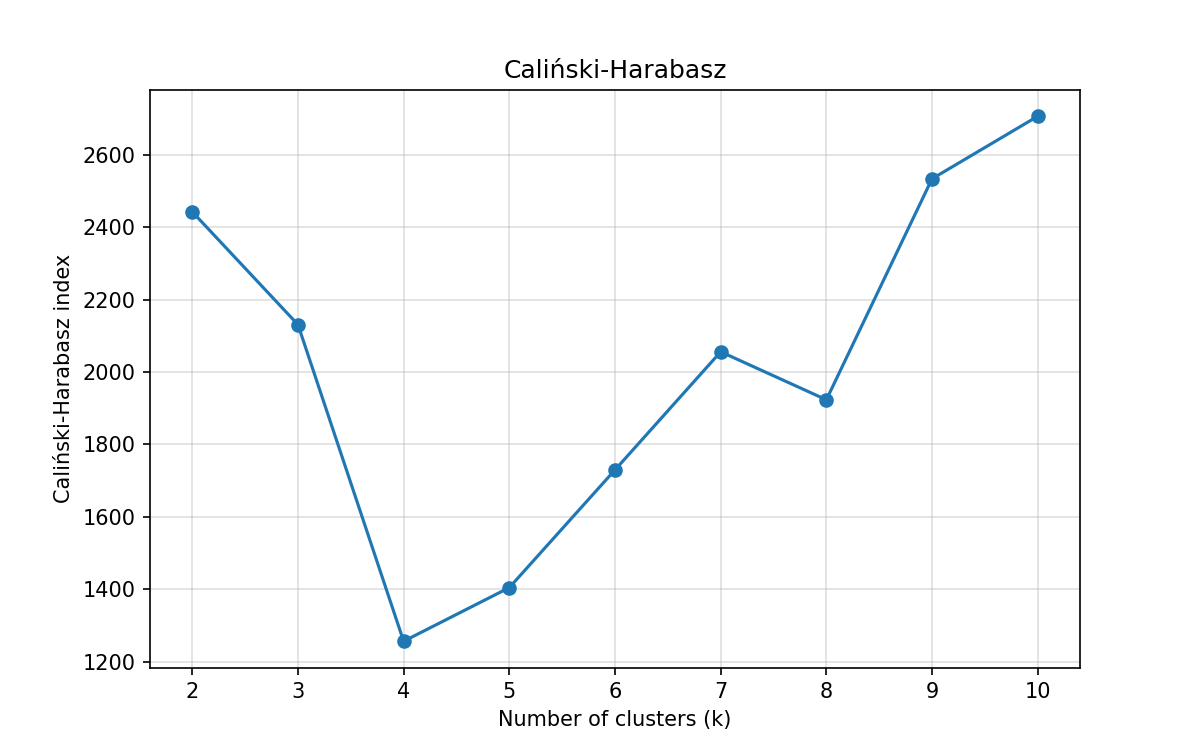

In [20]:
k_seq = range(2,11)

plt.figure(figsize = (8, 5))
plt.plot(k_seq, ch_scores, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Caliński-Harabasz index')
plt.title('Caliński-Harabasz')
plt.grid(alpha=0.4)
plt.xticks(k_seq)
plt.show()

Metryka silhouette wskazała liczbę klastrów równą 2 jako optymalną, natomiast indeks Calińskiego-Harabasza - 10. Widać jednak, że w przypadku silhouette 10 jest drugą najlepszą wartością, a z kolei w przypadku indeksu C-H - 2. Przeprowadzimy zatem klasteryzację dla obu tych wartości, choć podział na 10 klastrów wydaje się być zbyt dokładny a na 2 - zbyt ogólny.

<IPython.core.display.Javascript object>


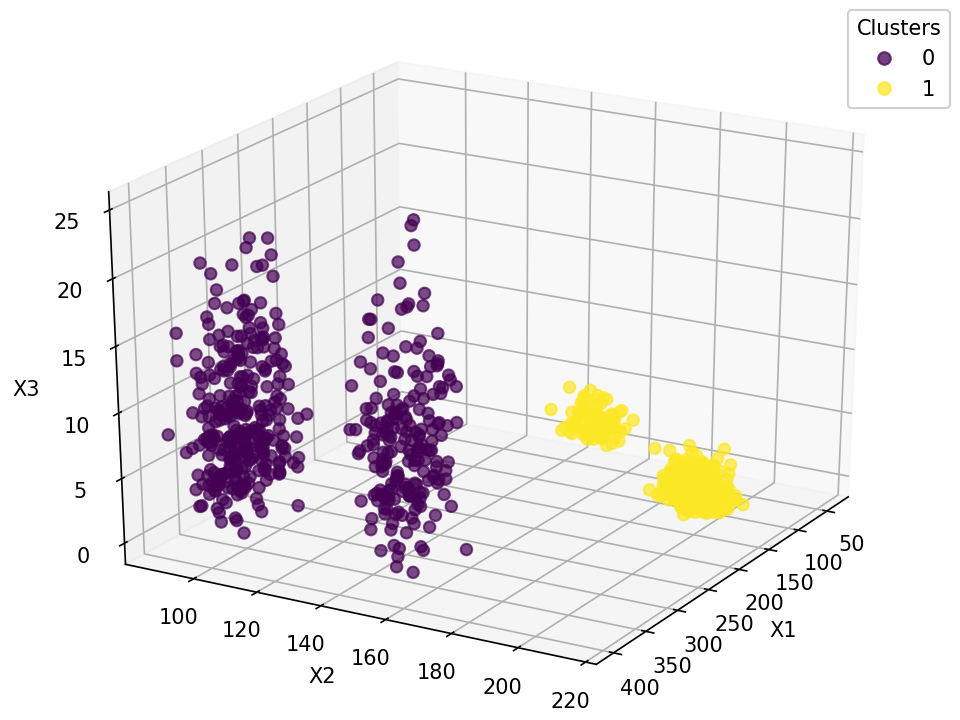

In [21]:
labels, gmm = gmm_model(data, n_components=2)
fig = plt.figure()
ax = Axes3D(fig)
plot = ax.scatter(data['X1'],data['X2'],data['X3'],c=labels, s=30, cmap='viridis', alpha=0.7)
legend = ax.legend(*plot.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.view_init(25, 30)
plt.show()

    
sh_gmm_2 = silhouette_score(data_scaled,labels)
ch_gmm_2 = calinski_harabasz_score(data_scaled,labels)

<IPython.core.display.Javascript object>


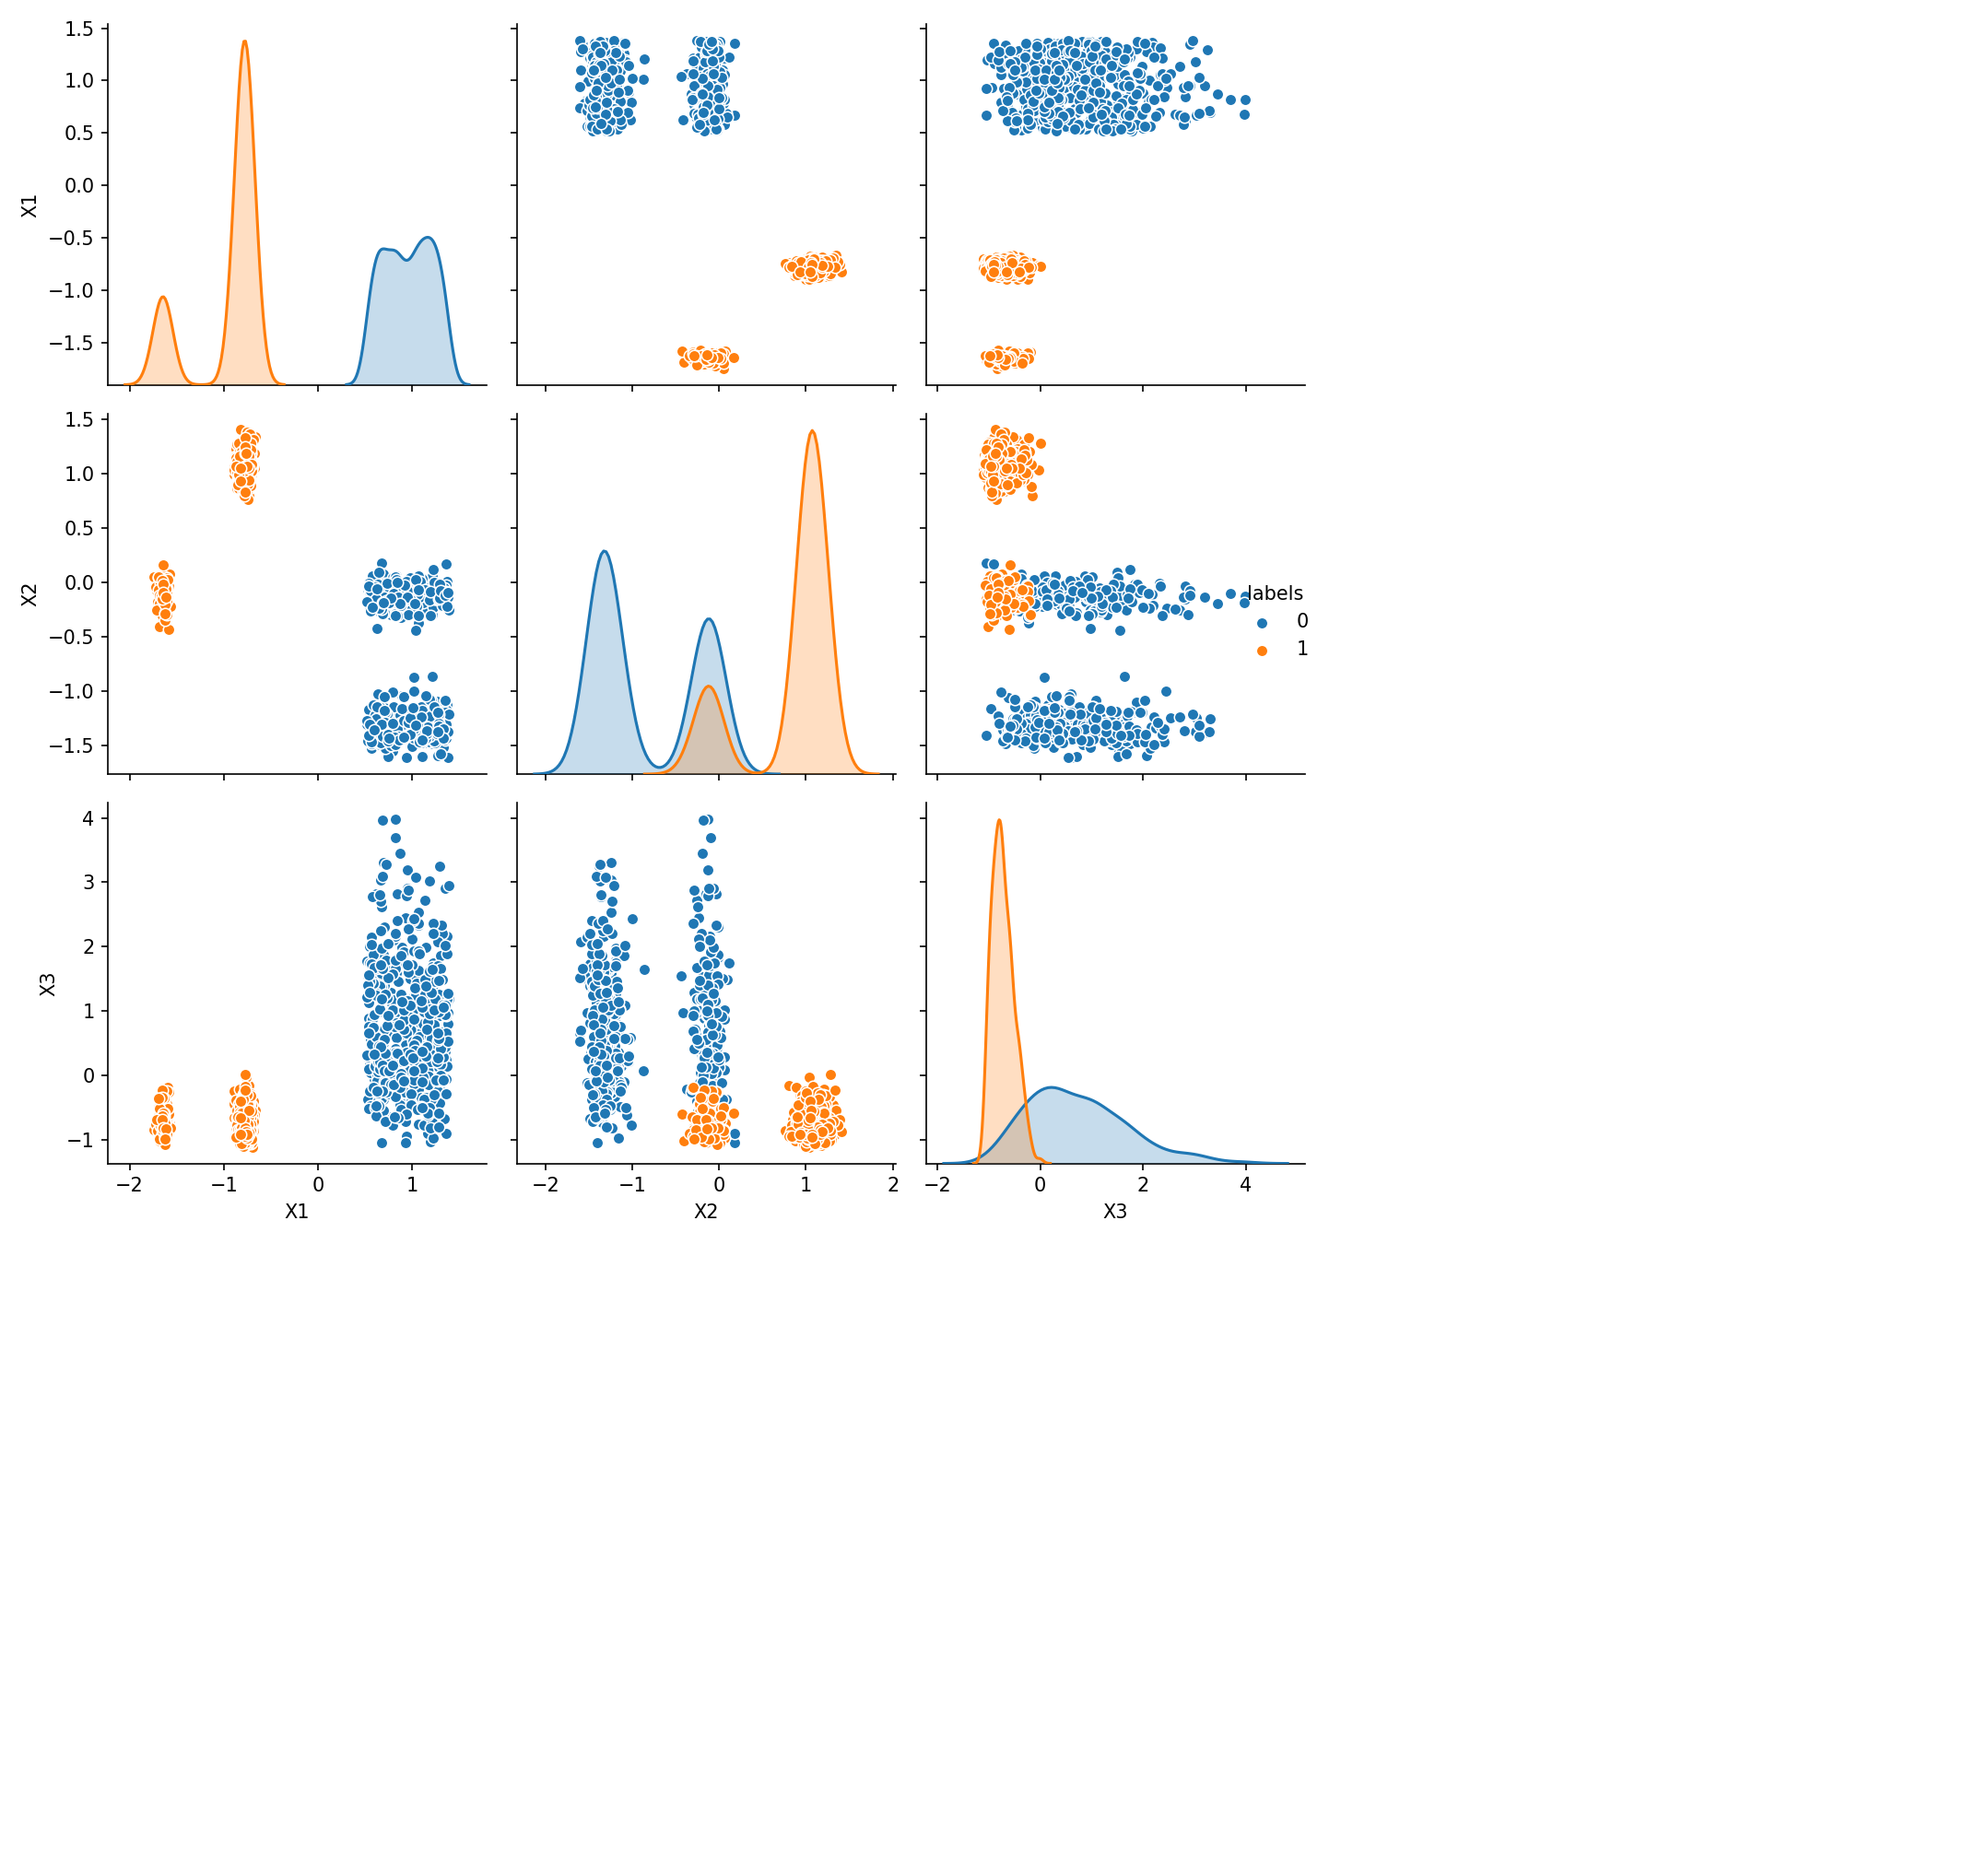

In [22]:
data_scaled_gmm = copy.deepcopy(data_scaled)
data_scaled_gmm['labels'] = labels
sns.pairplot(data_scaled_gmm, height=3, hue='labels', vars=["X1", "X2", "X3"])
plt.tight_layout()

<IPython.core.display.Javascript object>


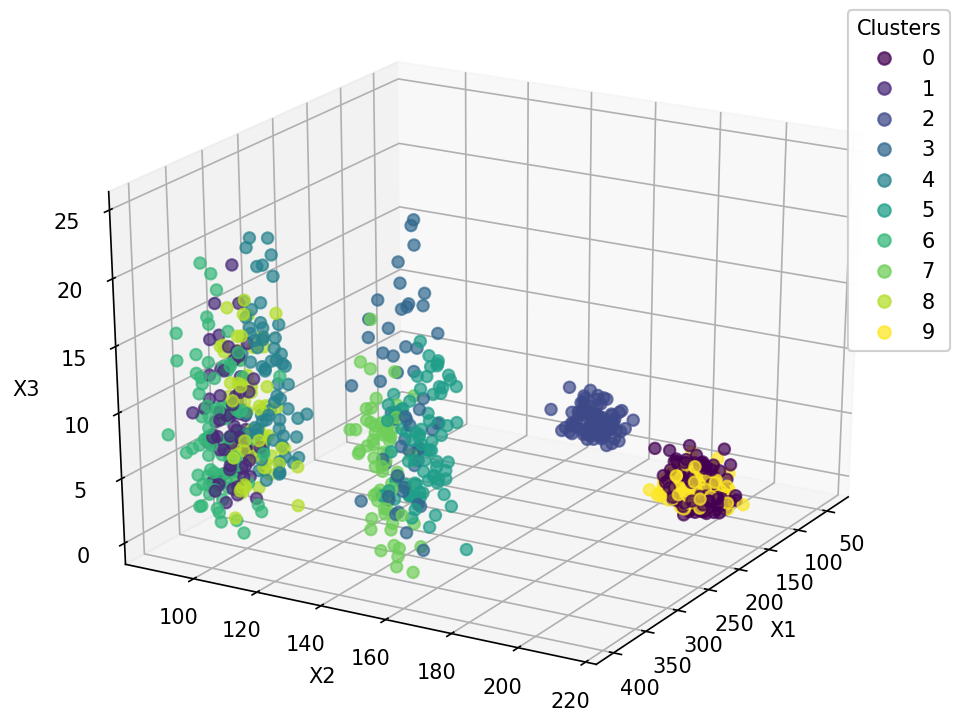

In [23]:
labels, gmm = gmm_model(data, n_components=10)
fig = plt.figure()
ax = Axes3D(fig)
plot = ax.scatter(data['X1'],data['X2'],data['X3'],c=labels, s=30, cmap='viridis', alpha=0.7)
legend = ax.legend(*plot.legend_elements(), loc="upper right", title="Clusters")
ax.add_artist(legend)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.view_init(25, 30)
plt.show()

sh_gmm_10 = silhouette_score(data_scaled,labels)
ch_gmm_10 = calinski_harabasz_score(data_scaled,labels)

<IPython.core.display.Javascript object>


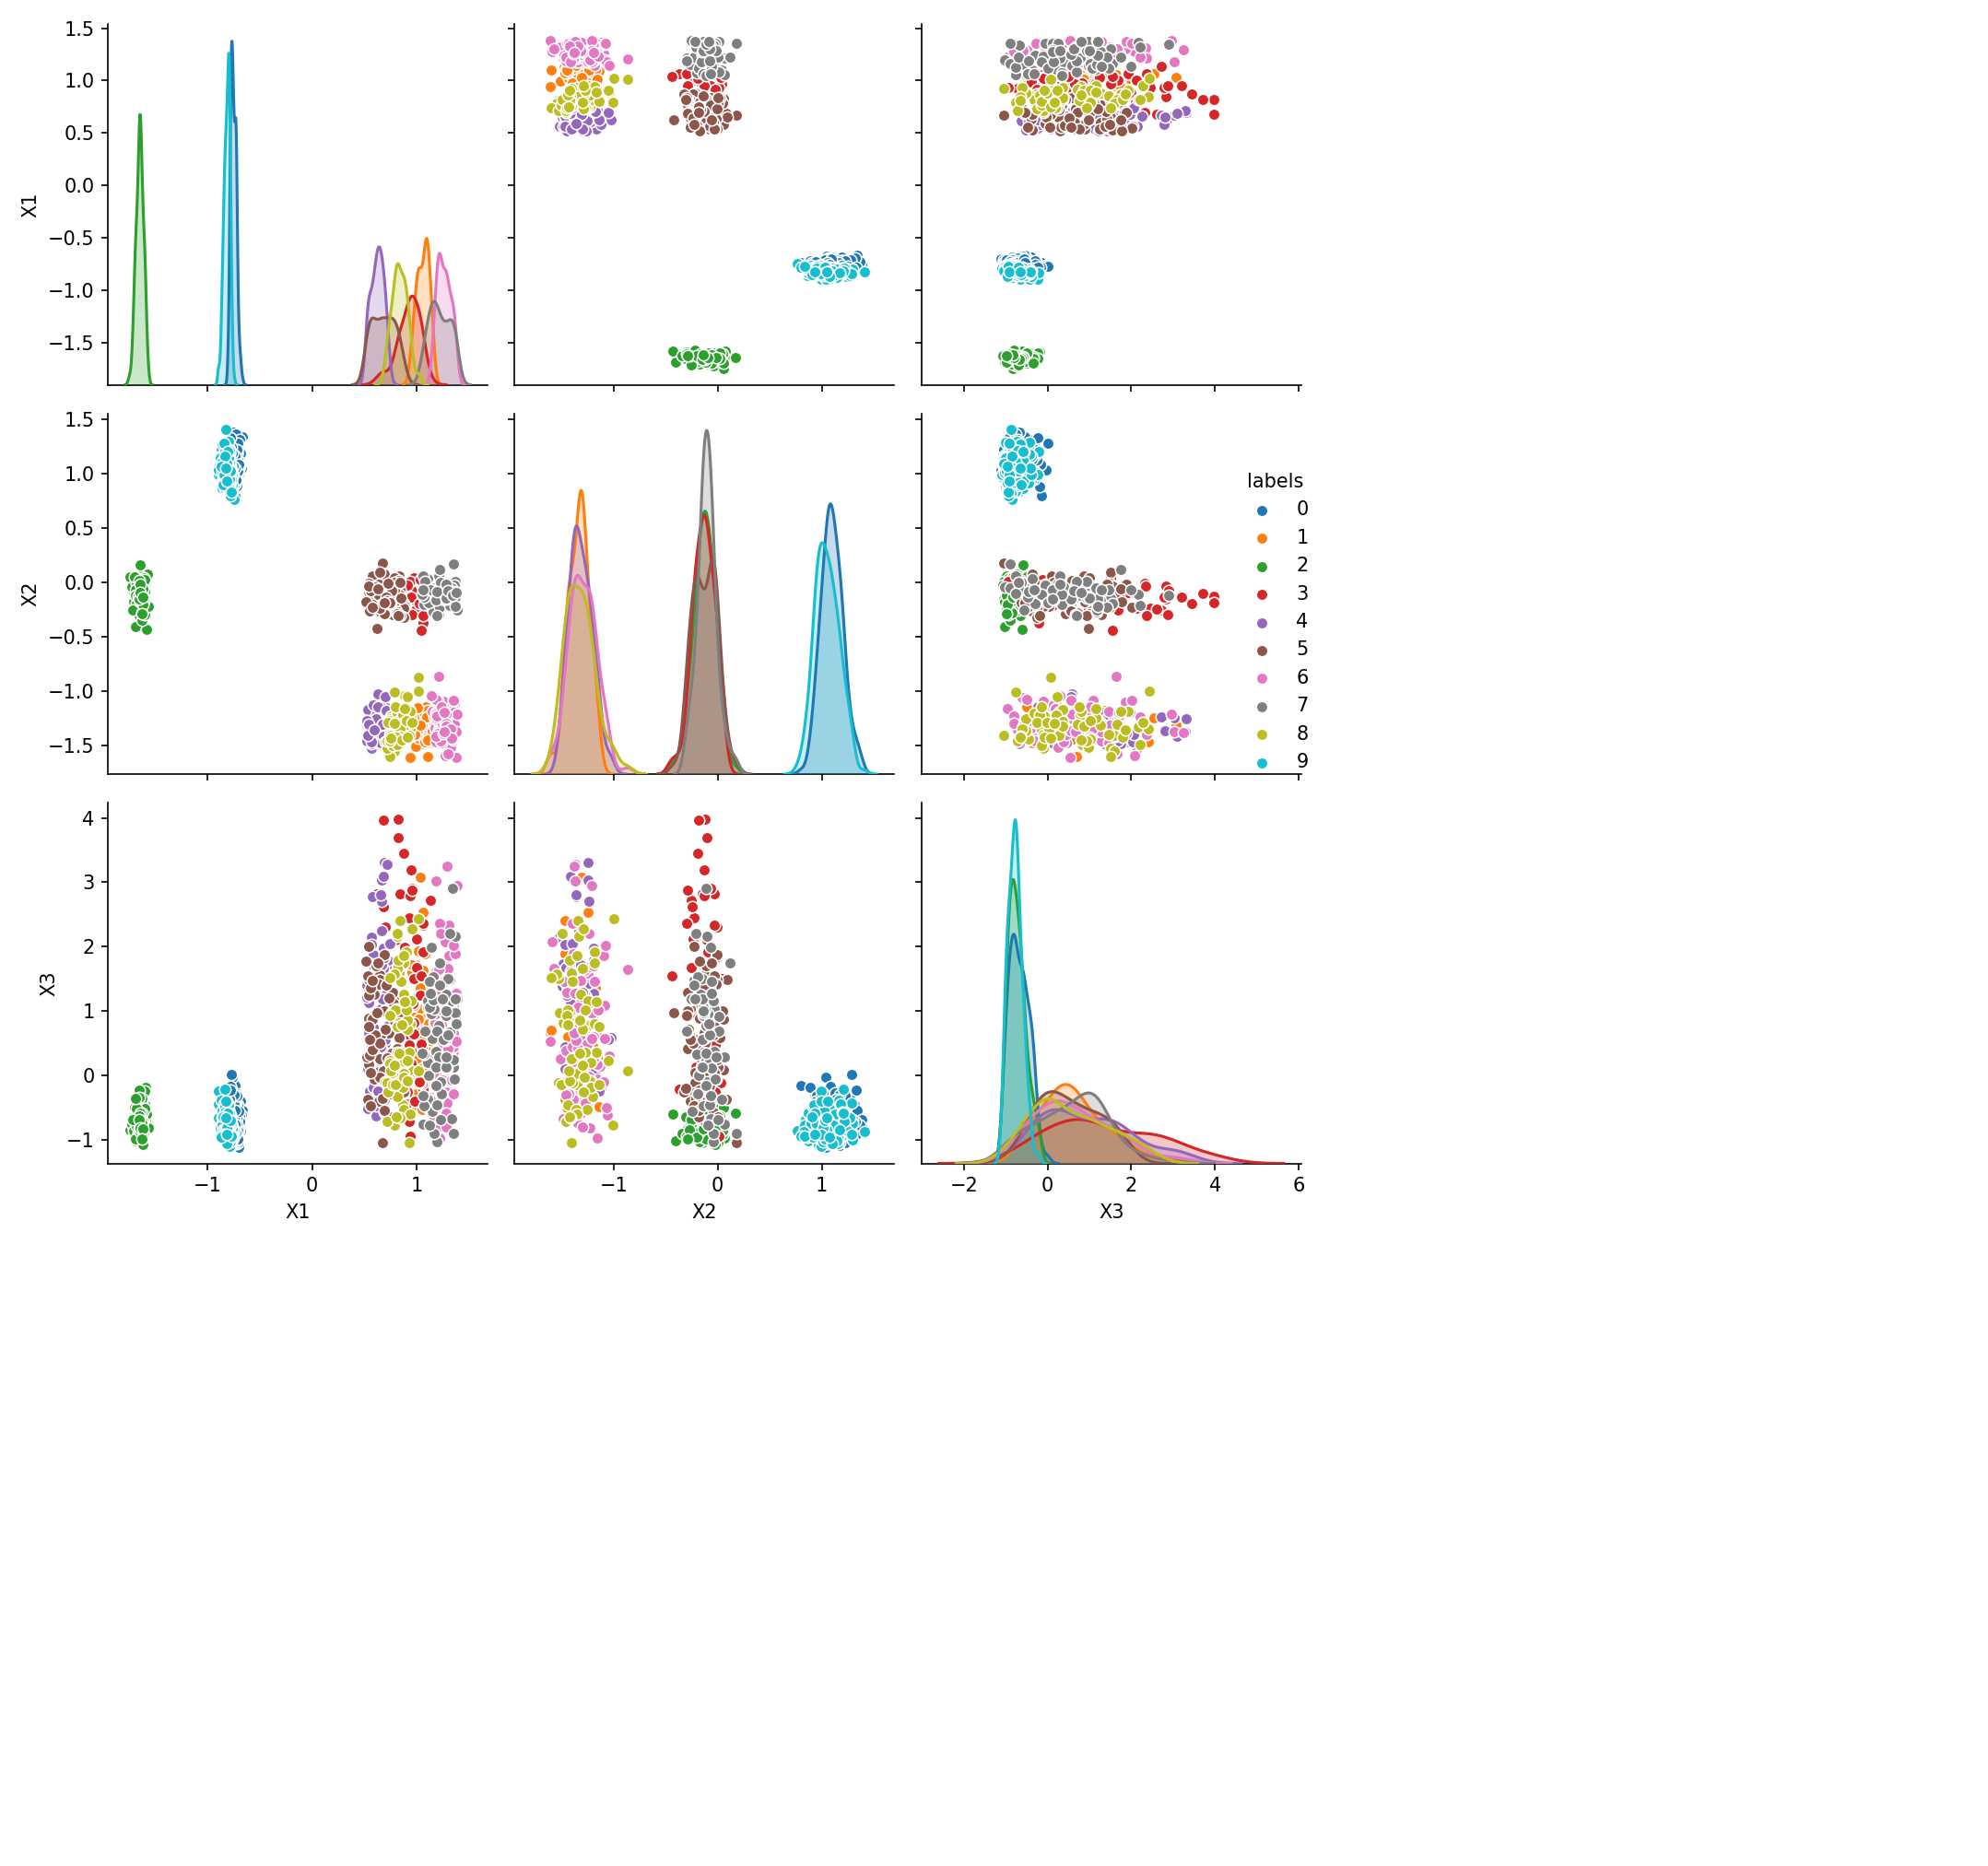

In [24]:
data_scaled_gmm = copy.deepcopy(data_scaled)
data_scaled_gmm['labels'] = labels
sns.pairplot(data_scaled_gmm, height=3, hue='labels', vars=["X1", "X2", "X3"])
plt.tight_layout()

Porównując oba podziały można stwierdzić, że podział na 2 klastry jest lepszy, mimo, że dość ogólny. W przypadku 10 dwa bardziej rozproszone klastry nie są zbyt dobrze podzielone. W dodatku nie jest on zbyt "stabilny" - przy kilku wywołaniach otrzymujemy zupełnie inne podziały, w przypadku 2 klastrów zawsze takie same. 

## Porównanie 

Porównamy wartości metryk dla algorytmu DBSCAN z eps = 0.55 oraz GMM z k = 2

In [25]:
wyniki = pd.DataFrame({'Silhouette': [sh_dbs,sh_gmm_2], 'Caliński-Harabasz': [ch_dbs, ch_gmm_2]})
wyniki.rename(index={0: "DBSCAN", 1: "GMM - 2"})

Silhouette  Caliński-Harabasz
DBSCAN     0.657175        1654.511257
GMM - 2    0.653770        2442.315877

Gdyby opierać się tylko na wartości metryk, lepszego podziału dokonał GMM (sumarycznie - wg Silhouette lepszy DBSCAN, według C-H GMM, ale wartości Silhouette są bardzo zbliżone, a C-H sporo różne). Mimo to wydaje mi się, że DBSCAN podzielił klastry "sensowniej" (na 3), podział na 2 jest bardzo ogólny i można wręcz powiedzieć "prosty".

## Oświadczenie

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu "Wstęp do uczenia maszynowego" została wykonana przeze mnie samodzielnie.

Agata Makarewicz, 298827